# DOA estimation using MUSIC with a uniform linear array

In [1]:
import numpy as np
import doatools.model as model
import doatools.estimation as estimation
import doatools.plotting as doaplot

import matplotlib.pyplot as plt
%matplotlib inline

Estimates: [-0.78539816 -0.40142573  0.          0.40142573  0.78539816]
Ground truth: [-0.78539816 -0.39269908  0.          0.39269908  0.78539816]


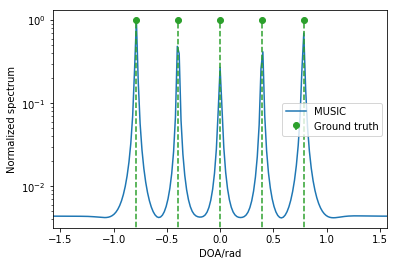

In [2]:
np.random.seed(128)

# Parameters
wavelength = 1.0 # Normalized wavelength. Recall that d0 = wavelength / 2.
d0 = wavelength / 2
power_source = 1.0
power_noise = 1.0 # SNR = 0 dB
n_snapshots = 100

# Create a 12-element ULA
ula = model.UniformLinearArray(12, d0)

# Place 7 far-field narrow-band sources uniformly between (-pi/4, pi/4)
sources = model.FarField1DSourcePlacement(np.linspace(-np.pi/4, np.pi/4, 5))

# Use the stochastic signal model.
source_signal = model.ComplexStochasticSignal(power_source, sources.size)
noise_signal = model.ComplexStochasticSignal(power_noise, ula.size)

# Get the estimated covariance matrix.
_, R = model.get_narrowband_snapshots(ula, sources, wavelength, source_signal, noise_signal,
                                      n_snapshots, return_covariance=True)

# Create a MUSIC-based estimator.
grid = estimation.FarField1DSearchGrid()
estimator = estimation.MUSIC(ula, wavelength, grid)

# Get the estimates.
resolved, estimates, sp = estimator.estimate(R, sources.size, output_spectrum=True)
print('Estimates: {0}'.format(estimates.locations))
print('Ground truth: {0}'.format(sources.locations))

# Plot the MUSIC-spectrum.
plt.figure()
doaplot.plot_spectrum({'MUSIC': sp}, grid, ground_truth=sources, use_log_scale=True)
plt.legend(loc='right')
plt.show()